In [177]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import norm, gaussian_kde

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [178]:
data = sns.load_dataset('titanic')
df = data[['survived','age','fare']]

In [179]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [180]:
print(df.shape)
print(df.isnull().sum())

(891, 3)
survived      0
age         177
fare          0
dtype: int64


In [181]:
df['age'].fillna(df['age'].mean(), inplace=True)

/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_52212/1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_52212/1503503937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].mean(), inpla

In [182]:
print(df.isnull().sum())

survived    0
age         0
fare        0
dtype: int64


In [183]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]


In [184]:
X_train,X_test,y_train, y_test = train_test_split(X,y)

/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_52212/54867803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


Text(0.5, 1.0, 'Age Pdf')

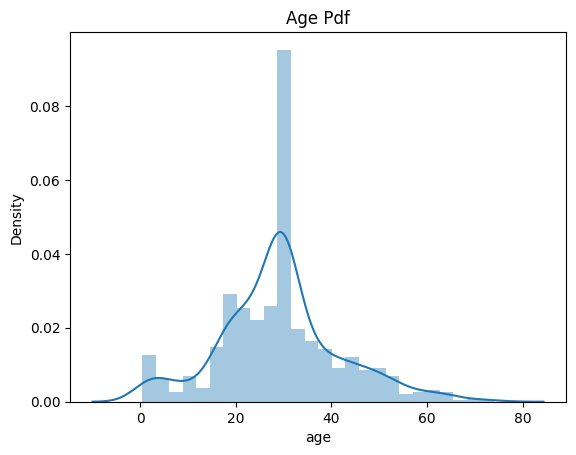

In [185]:
# plt.figure(figsize = (14,3))
# plt.subplots(121)
sns.distplot(X_train['age'])
plt.title('Age Pdf')

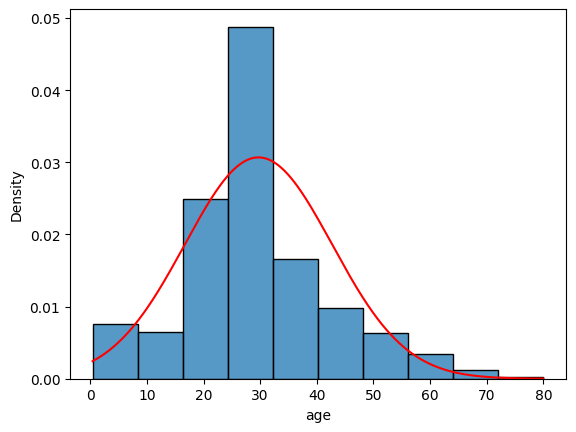

In [186]:
mean = df['age'].mean()
std = df['age'].std()
x_values = np.linspace(df['age'].min(), df['age'].max(), 1000)
pdf_values = norm.pdf(x_values, loc=mean, scale=std)


sns.histplot(x = df['age'], kde = False, bins = 10,label = 'Age Distribution', stat = 'density')
plt.plot(x_values, pdf_values, label = "Age PDF", color = 'red')

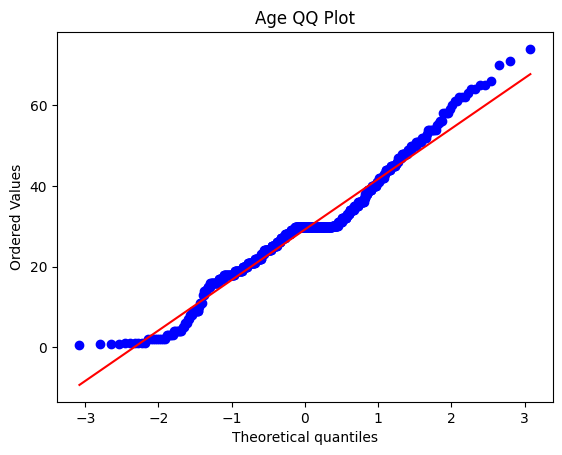

In [187]:

# plt.subplot(122)
stats.probplot(X_train['age'], dist = "norm", plot = plt)
plt.title("Age QQ Plot")

plt.show()

/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_52212/3498757607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


Text(0.5, 1.0, 'Age Pdf')

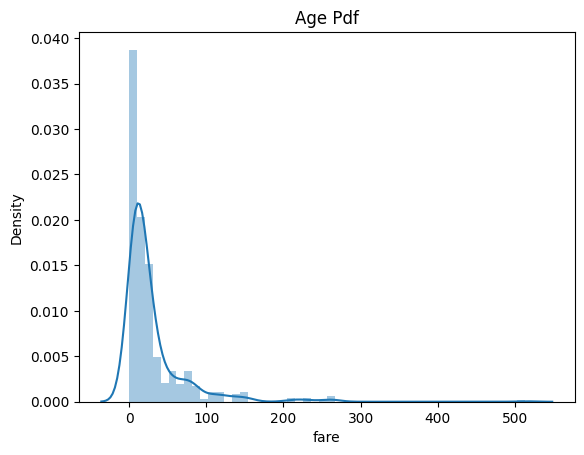

In [188]:
sns.distplot(X_train['fare'])
plt.title('Age Pdf')

<Axes: xlabel='fare', ylabel='Density'>

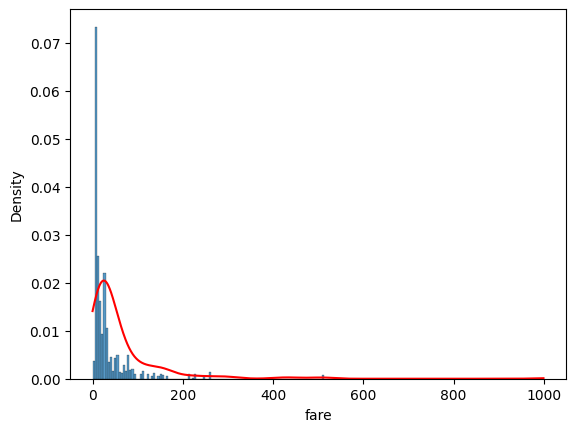

In [189]:
## Using Non Parametric to find the kde

kde = gaussian_kde(df['fare'])

x_values = np.linspace(df['fare'].min(), df['fare'].max(), 1000)
pdf = kde(x_values)

plt.plot(pdf, label = 'PDF for Fare', color = 'red')
sns.histplot(x = df['fare'], label = "Fare", stat = 'density', kde = False)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

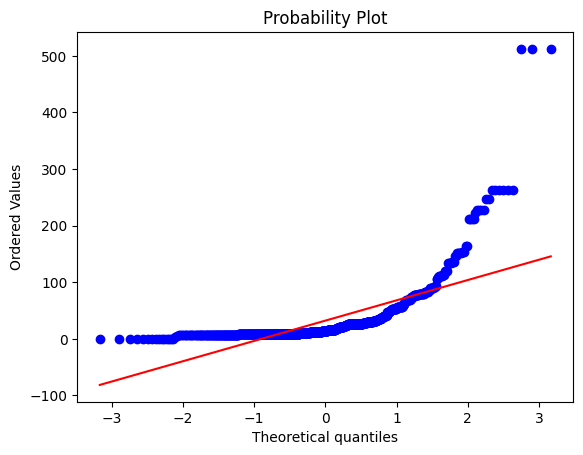

In [190]:
stats.probplot(df['fare'], dist = 'norm', plot =plt)


In [191]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [192]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy of Logistic Regression : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy of Decision Tree Classifier : {accuracy_score(y_test, y_pred2)}")

Accuracy of Logistic Regression : 0.6412556053811659
Accuracy of Decision Tree Classifier : 0.6188340807174888


In [193]:
transformer = FunctionTransformer(func = np.log1p)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [194]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print(f"Accuracy of Logistic Regression : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy of Decision Tree Classifier : {accuracy_score(y_test, y_pred2)}")

Accuracy of Logistic Regression : 0.6860986547085202
Accuracy of Decision Tree Classifier : 0.6188340807174888


In [195]:
X_train_transformed.head()

,age,fare
529,3.178054,2.525729
877,2.995732,2.185579
887,2.995732,3.433987
706,3.828641,2.674149
270,3.424234,3.465736


In [196]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

score_lr = np.mean(cross_val_score(clf, X_train_transformed, y_train, scoring = 'accuracy', cv = 10))
score_dt = np.mean(cross_val_score(clf2, X_train_transformed, y_train, scoring = 'accuracy', cv = 10))

print(f"Logistic regression score After Cross Validation : {score_lr}")
print(f"Decision Tree Classifier score After Cross Validation : {score_dt}")

Logistic regression score After Cross Validation : 0.6706241519674355
Decision Tree Classifier score After Cross Validation : 0.6302125734961554


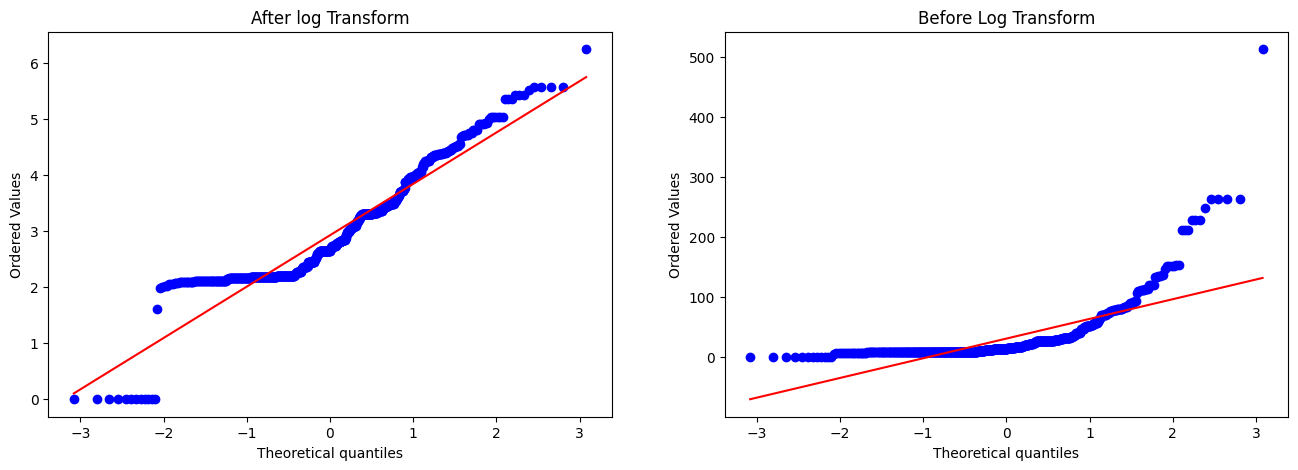

In [199]:
plt.figure(figsize=(16,5))
plt.subplot(121)
stats.probplot(X_train_transformed['fare'], dist = 'norm', plot = plt)
plt.title("After log Transform")
plt.subplot(122)
stats.probplot(X_train['fare'], dist = 'norm', plot = plt)
plt.title("Before Log Transform")

plt.show()

In [200]:
transformer2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['fare'])], remainder = 'passthrough')

X_train_transformed2 = transformer2.fit_transform(X_train)
X_test_transformed2 = transformer2.transform(X_test)

In [201]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)

print(f"Accuracy of Logistic Regression : {accuracy_score(y_test, y_pred)}")
print(f"Accuracy of Decision Tree Classifier : {accuracy_score(y_test, y_pred1)}")

Accuracy of Logistic Regression : 0.6771300448430493
Accuracy of Decision Tree Classifier : 0.6143497757847534
